# Deloitte March Madness Data Crunch 

In [78]:
import pandas as pd
df=pd.read_csv('NCAA_Tourney_2002_2019_update.csv').set_index('game_id')
test_df=pd.read_csv('NCAA_Tourney_2020_update.csv').set_index('game_id')

In [79]:
df2019=df.filter(regex='2019-',axis=0)
train_df=df
# train_df=df.drop(df2019.index)
# df2019

In [80]:
print(df2019)

                    team1_id  team1_score  team2_id  team2_score WLoc  num_ot  \
game_id                                                                         
2019-1192.0-1341.0    1192.0           82    1341.0           76    N       0   
2019-1125.0-1396.0    1125.0           81    1396.0           70    N       0   
2019-1295.0-1300.0    1295.0           78    1300.0           74    N       0   
2019-1113.0-1385.0    1113.0           74    1385.0           65    N       0   
2019-1278.0-1257.0    1278.0           86    1257.0           76    N       0   
2019-1261.0-1463.0    1261.0           79    1463.0           74    N       0   
2019-1120.0-1308.0    1120.0           78    1308.0           77    N       0   
2019-1437.0-1388.0    1437.0           61    1388.0           57    N       0   
2019-1196.0-1305.0    1196.0           70    1305.0           61    N       0   
2019-1459.0-1371.0    1459.0           84    1371.0           68    N       0   
2019-1242.0-1318.0    1242.0

# EDA

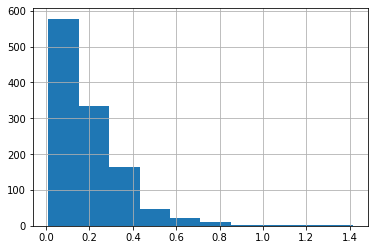

In [81]:
((train_df['team1_score']-train_df['team2_score'])/train_df['team2_score']).hist()

In [82]:
def drop_prefix(df: pd.DataFrame, prefix: str):
    df.columns=df.columns.str.replace(prefix,'',1)
    return df

In [83]:
team1_df=drop_prefix(train_df.filter(regex='^team1_',axis=1),'team1_')
team2_df=drop_prefix(train_df.filter(regex='^team2_',axis=1),'team2_')

In [84]:
team_df=team1_df.append(team2_df)

In [85]:
team_df

,id,score,position,seed,region,teamname,lat,long,coach_id,pt_school_ncaa,...,arate,opparate,stlrate,oppstlrate,tempo,adjtempo,oe,adjoe,de,adjde
game_id,,,,,,,,,,,,,,,,,,,,,
2019-1192.0-1341.0,1192.0,82,X16a,16,X,F Dickinson,40.896162,-74.030023,greg-herenda-1,1.0,...,53.201970,51.477833,0.108950,0.089778,67.8895,66.8424,108.370,106.296,104.7090,110.5500
2019-1125.0-1396.0,1125.0,81,W11a,11,W,Belmont,36.133866,-86.794715,rick-byrd-1,7.0,...,61.894737,44.512195,0.089031,0.082799,74.2457,71.1915,116.393,114.952,99.6691,101.8860
2019-1295.0-1300.0,1295.0,78,W16a,16,W,N Dakota St,46.894523,-96.805689,david-richman-1,1.0,...,46.062992,44.994111,0.070765,0.079430,66.4861,64.8533,108.198,106.675,110.0540,109.8730
2019-1113.0-1385.0,1113.0,74,X11a,11,X,Arizona St,33.421922,-111.940011,bobby-hurley-1,1.0,...,51.116334,54.838710,0.084913,0.086620,72.1332,70.5600,106.426,109.886,99.8027,98.6844
2019-1278.0-1257.0,1278.0,86,W10,10,W,Minnesota,44.977886,-93.235352,richard-pitino-1,1.0,...,60.238095,50.230415,0.070279,0.087525,67.9778,67.5056,103.298,110.803,101.4670,96.3335
2019-1261.0-1463.0,1261.0,79,W03,3,W,LSU,30.414805,-91.169552,will-wade-1,0.0,...,46.052632,44.214373,0.125518,0.090580,70.5931,69.9424,112.474,118.620,100.6450,97.6208
2019-1120.0-1308.0,1120.0,78,Y05,5,Y,Auburn,32.600201,-85.492409,bruce-pearl-1,1.0,...,53.303471,51.890482,0.131936,0.086938,68.8680,67.5646,113.394,119.283,99.3776,97.1706
2019-1437.0-1388.0,1437.0,61,Z06,6,Z,Villanova,40.039388,-75.345457,jay-wright-1,13.0,...,57.738095,56.242424,0.081587,0.080701,65.6680,63.6750,112.402,117.095,101.4370,98.3195
2019-1196.0-1305.0,1196.0,70,X10,10,X,Florida,29.638248,-82.361195,michael-white-1,2.0,...,51.105651,48.754915,0.109531,0.093820,64.8004,62.7575,104.227,110.318,97.2175,91.9997


In [86]:
team_df.columns

Index(['id', 'score', 'position', 'seed', 'region', 'teamname', 'lat', 'long',
       'coach_id', 'pt_school_ncaa', 'pt_overall_ncaa', 'pt_school_s16',
       'pt_overall_s16', 'pt_school_ff', 'pt_overall_ff',
       'pt_career_school_wins', 'pt_career_school_losses',
       'pt_career_overall_wins', 'pt_career_overall_losses',
       'pt_team_season_wins', 'pt_team_season_losses', 'pt_coach_season_wins',
       'pt_coach_season_losses', 'ap_final', 'ap_preseason',
       'coaches_before_final', 'coaches_preseason', 'fg2pct', 'fg3pct',
       'ftpct', 'blockpct', 'oppfg2pct', 'oppfg3pct', 'oppftpct',
       'oppblockpct', 'f3grate', 'oppf3grate', 'arate', 'opparate', 'stlrate',
       'oppstlrate', 'tempo', 'adjtempo', 'oe', 'adjoe', 'de', 'adjde'],
      dtype='object')

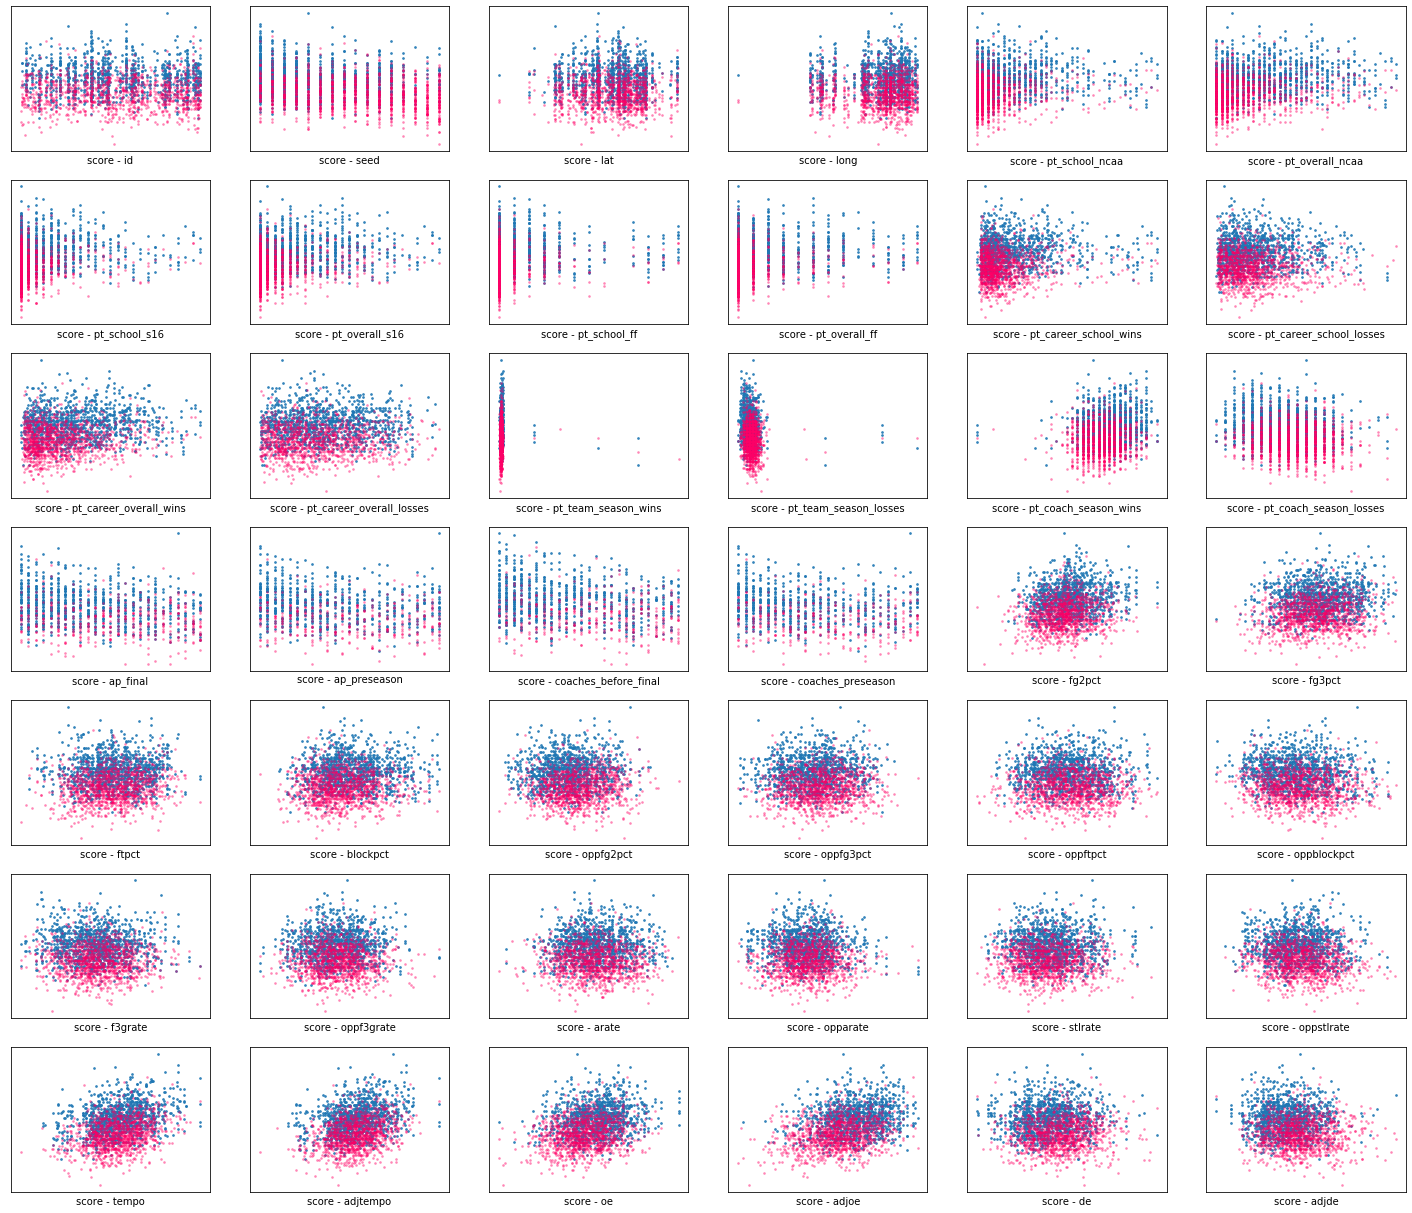

In [87]:
from matplotlib import pyplot as plt
team1_df_numeric=team1_df.select_dtypes(include=["float", 'int', 'int64']).drop('score',axis=1)
team2_df_numeric=team2_df.select_dtypes(include=["float", 'int', 'int64']).drop('score',axis=1)
plt.figure(figsize=(25,25))
for i in range(len(team1_df_numeric.columns)):
     plt.subplot(8,6,i+1)
     plt.xticks([])
     plt.yticks([])
     plt.grid(False)
     plt.scatter(team1_df_numeric[team1_df_numeric.columns[i]],team1_df['score'],s=3,c='#1f77b4CC')
     plt.scatter(team2_df_numeric[team2_df_numeric.columns[i]],team2_df['score'],s=3,c='#ff006655')
     plt.xlabel('score - %s'%team1_df_numeric.columns[i])
plt.show()


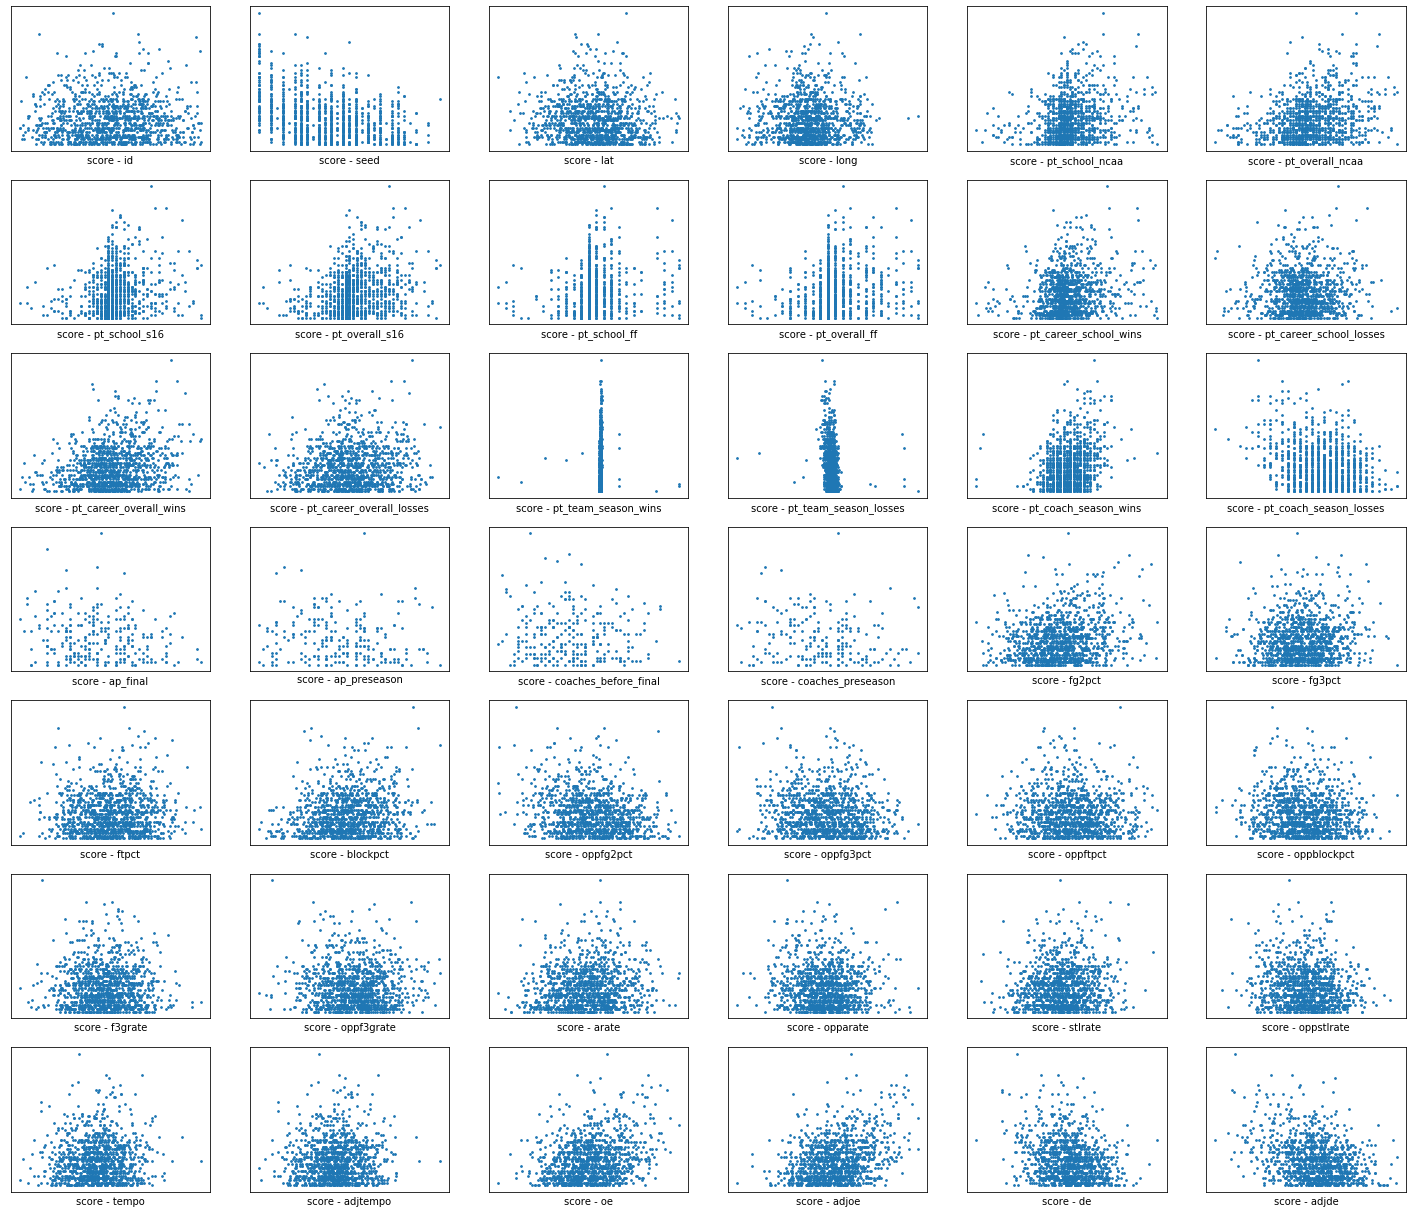

In [88]:
plt.figure(figsize=(25,25))
team_diff=team1_df_numeric-team2_df_numeric
score_diff=team1_df['score']-team2_df['score']
for i in range(len(team_diff.columns)):
    plt.subplot(8,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.scatter(team_diff[team_diff.columns[i]],score_diff,s=3)
    plt.xlabel('score - %s'%team_diff.columns[i])
plt.show()

# Feature Engineering

In [89]:
#Calculate the average of each team’s historical scores separately (see how they perform in general)
team_mean_score=team_df.groupby('id').mean()['score'].rename_axis('mean_score')
team_mean_score.name='mean_score'
#Calculate the median of each team's historical score separately
team_median_score=team_df.groupby('id').median()['score'].rename_axis('median_score')
team_median_score.name='median_score'

In [90]:
tmp1=train_df.filter(regex='^team1_',axis=1)
tmp1.columns=tmp1.columns.str.replace('team1_','team2_',1)
tmp2=train_df.filter(regex='^team2_',axis=1)
tmp2.columns=tmp2.columns.str.replace('team2_','team1_',1)
tmp=train_df.append(pd.concat((tmp1,tmp2),axis=1))
#Calculate the sum of the points difference between each team and the opponent team 
tmp['score_diff']=tmp['team1_score']-tmp['team2_score']
team_score_diff=tmp.groupby('team1_id').mean()['score_diff'].rename_axis('score_diff')
team_score_diff.name='score_diff'

/Users/rachelchen/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [91]:
#AVG(score/tempo)
tmp=team_df.set_index('id')
team_ppp=(tmp['score']/tmp['tempo']).sort_index().groupby(level=0).mean()

In [92]:

team_mean_score.name='team1_mean_score'
train_df=train_df.join(team_mean_score,on='team1_id')
team_mean_score.name='team2_mean_score'
train_df=train_df.join(team_mean_score,on='team2_id')

In [93]:
team_median_score.name='team1_median_score'
train_df=train_df.join(team_median_score,on='team1_id')
team_median_score.name='team2_median_score'
train_df=train_df.join(team_median_score,on='team2_id')

In [94]:
team_score_diff.name='team1_score_diff'
train_df=train_df.join(team_score_diff,on='team1_id')
team_score_diff.name='team2_score_diff'
train_df=train_df.join(team_score_diff,on='team2_id')

In [95]:
team_ppp.name='team1_ppp'
train_df=train_df.join(team_ppp,on='team1_id')
team_ppp.name='team1_pppa'
train_df=train_df.join(team_ppp,on='team2_id')
train_df['team1_ppp_diff']=train_df['team1_ppp']-train_df['team1_pppa']
team_ppp.name='team2_ppp'
train_df=train_df.join(team_ppp,on='team2_id')
team_ppp.name='team2_pppa'
train_df=train_df.join(team_ppp,on='team1_id')
train_df['team2_ppp_diff']=train_df['team2_ppp']-train_df['team2_pppa']

In [96]:
selected_feature=['score',"pt_coach_season_wins","pt_coach_season_losses","fg2pct","fg3pct","blockpct","oe","adjoe","de","adjde","seed","mean_score","median_score","score_diff","ppp","pppa","ppp_diff"]
real_feature=[]
for i in selected_feature:
    real_feature+=['team1_'+i,'team2_'+i]
selected=train_df[real_feature]


In [97]:
from sklearn.model_selection import train_test_split

team1_df=drop_prefix(train_df.filter(regex='^team1_',axis=1),'team1_')
team2_df=drop_prefix(train_df.filter(regex='^team2_',axis=1),'team2_')
(team1_win,team1_lose,team2_lose,team2_win)=train_test_split(team1_df,team2_df,test_size=0.5)
team_one=team1_win.append(team2_win)
team_two=team2_lose.append(team1_lose)

In [98]:
team_one[selected_feature]-team_two[selected_feature]

,score,pt_coach_season_wins,pt_coach_season_losses,fg2pct,fg3pct,blockpct,oe,adjoe,de,adjde,seed,mean_score,median_score,score_diff,ppp,pppa,ppp_diff
game_id,,,,,,,,,,,,,,,,,
2008-1242.0-1340.0,24,8.0,-6.0,4.110900,-0.303000,7.488000,8.5485,13.9607,-11.4393,-12.4553,-15,16.531250,15.0,30.281250,0.181791,-0.181791,0.363581
2004-1246.0-1197.0,20,12.0,-12.0,5.797600,0.841000,5.005700,7.4342,14.8869,-8.8975,-17.9931,-15,1.954545,1.5,21.727273,0.062720,-0.062720,0.125439
2009-1328.0-1288.0,28,4.0,-6.0,11.636500,1.303000,3.143400,12.6370,17.2081,4.4809,-1.9168,-13,19.032258,21.0,29.887097,0.270725,-0.270725,0.541449
2002-1104.0-1194.0,8,7.0,-4.0,5.622400,-3.043700,-0.140300,8.1464,14.6285,-3.1870,-6.0493,-13,-8.909091,-8.0,3.636364,-0.065101,0.065101,-0.130203
2005-1452.0-1403.0,5,1.0,0.0,2.504100,-1.715200,0.635800,0.6008,4.5831,4.0476,3.7137,1,1.601533,-1.5,-1.214559,0.058209,-0.058209,0.116418
2003-1268.0-1423.0,2,-5.0,3.0,-0.983100,1.828400,10.700600,0.8644,0.6687,0.3497,-2.7944,-5,-3.640000,-2.0,7.633333,-0.128763,0.128763,-0.257526
2002-1356.0-1208.0,2,5.0,-2.0,-0.862200,4.325000,2.396400,-1.3553,-9.1120,-6.2016,-2.2647,8,-4.500000,-1.0,1.600000,-0.028716,0.028716,-0.057432
2007-1207.0-1314.0,12,-2.0,0.0,3.159900,1.234200,4.667100,-0.9874,0.5104,3.3811,1.9723,1,-12.463364,-15.0,-7.114551,0.006116,-0.006116,0.012231
2002-1268.0-1246.0,10,6.0,-5.0,1.008000,5.904900,1.276200,7.8901,6.4295,-0.6175,0.4281,-3,0.905455,3.0,-3.927273,-0.035412,0.035412,-0.070825


In [99]:
import numpy as np
final_train=team_one[selected_feature]-team_two[selected_feature]
half_length=len(team1_win)
labels=np.concatenate((np.ones(half_length),np.zeros(len(team_one)-half_length)))

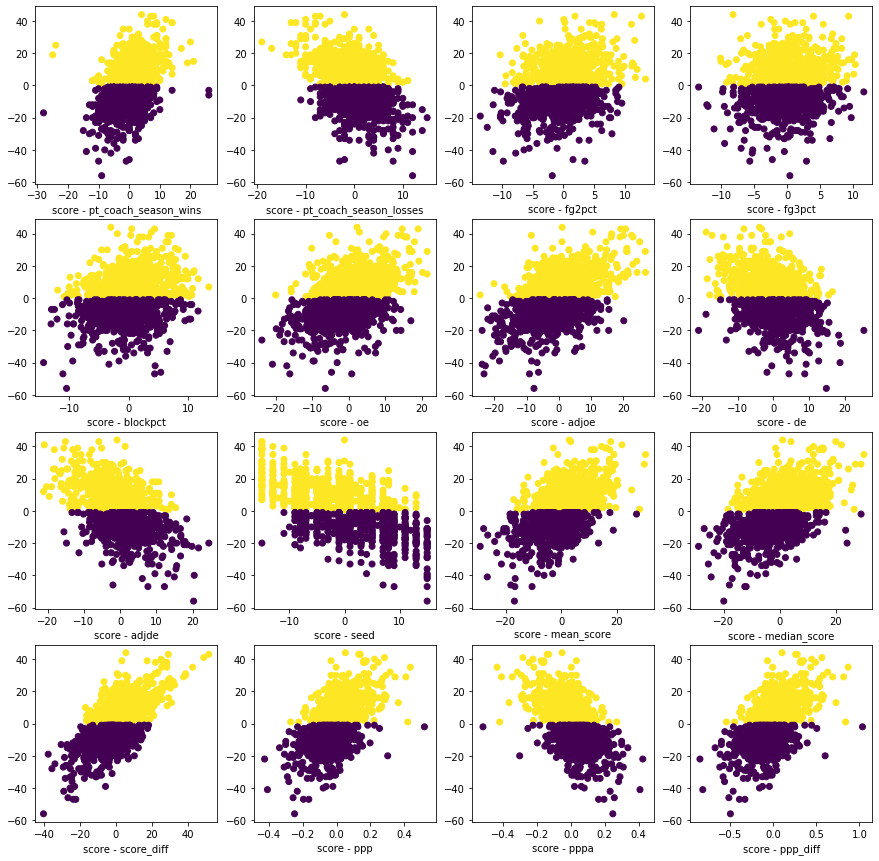

In [100]:
plt.figure(figsize=(15,15))
final_train=team_one[selected_feature]-team_two[selected_feature]
final_score=final_train['score']
final_train=final_train.drop('score',axis=1)
for i in range(len(final_train.columns)):
    plt.subplot(4,4,i+1)
    # plt.xticks([])
    # plt.yticks([])
    plt.grid(False)
    plt.scatter(final_train[final_train.columns[i]],final_score,c=labels)
    plt.xlabel('score - %s'%final_train.columns[i])
plt.show()

## Pre-processing

In [101]:
from sklearn.preprocessing import normalize
import numpy as np
#normalization
norm_final_train=(final_train-np.mean(final_train))/np.std(final_train)
norm_labels=labels
# norm_labels=(labels-np.mean(labels))/np.std(labels)

## Model

In [102]:
from sklearn import metrics
from IPython.display import display, HTML


# define a function to evaluate our classification models based on four metrics
def get_metrics(true_labels, predicted_labels,proba_labels):
    
    print ('Accuracy:', np.round(                                                    
                        metrics.accuracy_score(true_labels, 
                                               predicted_labels),
                        2))
    print ('Precision:', np.round(
                        metrics.precision_score(true_labels, 
                                               predicted_labels),
                        2))
    print ('Recall:', np.round(
                        metrics.recall_score(true_labels, 
                                               predicted_labels),
                        2))
    print ('F1 Score:', np.round(
                        metrics.f1_score(true_labels, 
                                               predicted_labels),
                        2))
    print ('Log loss:', np.round(
                        metrics.log_loss(true_labels, 
                                               proba_labels),
                        2))
    
    print("Confusion matrix: ")
    cm = metrics.confusion_matrix(true_labels, predicted_labels)
    df=pd.DataFrame(cm, index=range(0,2), columns=range(0,2))  
    display(HTML(df.to_html()))

In [103]:
(train_data,validation_data,train_labels,validation_labels)=train_test_split(norm_final_train,norm_labels)

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

lr=LogisticRegression(verbose=1)
mlp=MLPClassifier((5,),verbose=0)

print('\n---> LogisticRegression: \n')
lr.fit(train_data,train_labels)
prediction=lr.predict(validation_data)
prediction_proba=lr.predict_proba(validation_data)
prediction_df=pd.DataFrame(prediction_proba,columns=lr.classes_)
get_metrics(validation_labels,prediction,prediction_df[1.0])

print('\n---> mlp: \n')
mlp.fit(train_data,train_labels)
prediction=mlp.predict(validation_data)
prediction_proba=mlp.predict_proba(validation_data)
prediction_df=pd.DataFrame(prediction_proba,columns=mlp.classes_)
get_metrics(validation_labels,prediction,prediction_df[1.0])



---> LogisticRegression: 

[LibLinear]Accuracy: 0.74
Precision: 0.79
Recall: 0.69
F1 Score: 0.74
Log loss: 0.52
Confusion matrix: 


/Users/rachelchen/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,0,1
0,107,29
1,48,108



---> mlp: 

Accuracy: 0.72
Precision: 0.76
Recall: 0.71
F1 Score: 0.73
Log loss: 0.54
Confusion matrix: 


/Users/rachelchen/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,0,1
0,100,36
1,45,111


In [105]:
test_feature=real_feature[2:]
team_mean_score.name='team1_mean_score'
df2019_test=df2019.join(team_mean_score,on='team1_id')
team_mean_score.name='team2_mean_score'
df2019_test=df2019_test.join(team_mean_score,on='team2_id')
team_median_score.name='team1_median_score'
df2019_test=df2019_test.join(team_median_score,on='team1_id')
team_median_score.name='team2_median_score'
df2019_test=df2019_test.join(team_median_score,on='team2_id')
team_score_diff.name='team1_score_diff'
df2019_test=df2019_test.join(team_score_diff,on='team1_id')
team_score_diff.name='team2_score_diff'
df2019_test=df2019_test.join(team_score_diff,on='team2_id')
team_ppp.name='team1_ppp'
df2019_test=df2019_test.join(team_ppp,on='team1_id')
team_ppp.name='team1_pppa'
df2019_test=df2019_test.join(team_ppp,on='team2_id')
df2019_test['team1_ppp_diff']=df2019_test['team1_ppp']-df2019_test['team1_pppa']
team_ppp.name='team2_ppp'
df2019_test=df2019_test.join(team_ppp,on='team2_id')
team_ppp.name='team2_pppa'
df2019_test=df2019_test.join(team_ppp,on='team1_id')
df2019_test['team2_ppp_diff']=df2019_test['team2_ppp']-df2019_test['team2_pppa']
test_selected=df2019_test[test_feature]
team1_test_df=drop_prefix(test_selected.filter(regex='^team1_',axis=1),'team1_')
team2_test_df=drop_prefix(test_selected.filter(regex='^team2_',axis=1),'team2_')
final_test=team1_test_df-team2_test_df
final_test=(final_test-np.mean(final_train))/np.std(final_train)
final_test=final_test.fillna(0)

prediction_proba=lr.predict_proba(final_test)

prediction_df=pd.DataFrame(prediction_proba,columns=mlp.classes_)
pd.Series(prediction_df[1.0].values,index=df2019.index,name='probability').to_csv('submission.csv',header=True)
print ('Log loss:', np.round(
                    metrics.log_loss(np.ones(len(df2019)), 
                                            prediction_df[1.0].values,labels=[1.0,0.0]),
                    2))

Log loss: 0.49


In [106]:
test_feature=real_feature[2:]
team_mean_score.name='team1_mean_score'
test_in_use_df=test_df.join(team_mean_score,on='team1_id')
team_mean_score.name='team2_mean_score'
test_in_use_df=test_in_use_df.join(team_mean_score,on='team2_id')
team_median_score.name='team1_median_score'
test_in_use_df=test_in_use_df.join(team_median_score,on='team1_id')
team_median_score.name='team2_median_score'
test_in_use_df=test_in_use_df.join(team_median_score,on='team2_id')
team_score_diff.name='team1_score_diff'
test_in_use_df=test_in_use_df.join(team_score_diff,on='team1_id')
team_score_diff.name='team2_score_diff'
test_in_use_df=test_in_use_df.join(team_score_diff,on='team2_id')
team_ppp.name='team1_ppp'
test_in_use_df=test_in_use_df.join(team_ppp,on='team1_id')
team_ppp.name='team1_pppa'
test_in_use_df=test_in_use_df.join(team_ppp,on='team2_id')
test_in_use_df['team1_ppp_diff']=test_in_use_df['team1_ppp']-test_in_use_df['team1_pppa']
team_ppp.name='team2_ppp'
test_in_use_df=test_in_use_df.join(team_ppp,on='team2_id')
team_ppp.name='team2_pppa'
test_in_use_df=test_in_use_df.join(team_ppp,on='team1_id')
test_in_use_df['team2_ppp_diff']=test_in_use_df['team2_ppp']-test_in_use_df['team2_pppa']
test_selected=test_in_use_df[test_feature]
team1_test_df=drop_prefix(test_selected.filter(regex='^team1_',axis=1),'team1_')
team2_test_df=drop_prefix(test_selected.filter(regex='^team2_',axis=1),'team2_')

final_test=team1_test_df-team2_test_df
final_test=(final_test-np.mean(final_train))/np.std(final_train)
final_test=final_test.fillna(0)

prediction_proba=mlp.predict_proba(final_test)
prediction_df=pd.DataFrame(prediction_proba,columns=mlp.classes_)
pd.Series(prediction_df[1.0].values,index=test_df.index,name='probability').to_csv('submission.csv',header=True)

## TensorFlow CNN

In [107]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.1.0


In [108]:
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.15),
    layers.Dense(32, activation='relu'),
    layers.Dense(2)
])


In [109]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=[
                  'accuracy'])

In [110]:
history=model.fit(train_data.values, train_labels,
    validation_data=(validation_data.values,validation_labels),
    epochs=50,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10),
    ]
)

model.summary()

Train on 875 samples, validate on 292 samples
Epoch 1/50
875/875 [==============================] - 0s 350us/sample - loss: 0.6107 - accuracy: 0.6526 - val_loss: 0.5325 - val_accuracy: 0.6986
Epoch 2/50
875/875 [==============================] - 0s 44us/sample - loss: 0.5393 - accuracy: 0.7200 - val_loss: 0.5222 - val_accuracy: 0.7055
Epoch 3/50
875/875 [==============================] - 0s 43us/sample - loss: 0.5275 - accuracy: 0.7394 - val_loss: 0.5218 - val_accuracy: 0.7021
Epoch 4/50
875/875 [==============================] - 0s 45us/sample - loss: 0.5117 - accuracy: 0.7337 - val_loss: 0.5184 - val_accuracy: 0.6986
Epoch 5/50
875/875 [==============================] - 0s 44us/sample - loss: 0.5134 - accuracy: 0.7337 - val_loss: 0.5251 - val_accuracy: 0.7226
Epoch 6/50
875/875 [==============================] - 0s 42us/sample - loss: 0.5039 - accuracy: 0.7451 - val_loss: 0.5210 - val_accuracy: 0.7158
Epoch 7/50
875/875 [==============================] - 0s 42us/sample - loss: 0.4953

# Evaluation

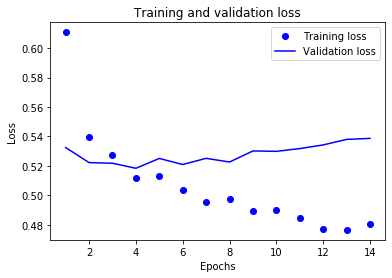

In [111]:
history_dict = history.history
history_dict.keys()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [112]:
tmp=team_one[selected_feature].drop('score',axis=1).append(team_two[selected_feature].drop('score',axis=1))
cnn_mean=tmp.mean()
cnn_std=tmp.std()
cnn_team_one=(team_one[selected_feature].drop('score',axis=1)-cnn_mean)/cnn_std
cnn_team_two=(team_two[selected_feature].drop('score',axis=1)-cnn_mean)/cnn_std

In [113]:
cnn_train=np.stack((cnn_team_one.values,cnn_team_two.values),axis=1)
cnn_train

array([[[ 1.76533432, -1.52496665,  1.48767899, ...,  0.72348755,
         -1.78939875,  1.70556425],
        [-0.36044424,  0.36608382,  0.06897455, ..., -1.78939875,
          0.72348755, -1.70556425]],

       [[ 0.43672272, -1.20979157,  0.51747689, ...,  0.87488586,
          0.0079131 ,  0.58843798],
        [-2.75194512,  2.57230938, -1.4833212 , ...,  0.0079131 ,
          0.87488586, -0.58843798]],

       [[ 0.70244504, -0.8946165 ,  1.90446591, ...,  0.04474441,
         -3.69747365,  2.53994515],
        [-0.36044424,  0.99643398, -2.11138324, ..., -3.69747365,
          0.04474441, -2.53994515]],

       ...,

       [[-0.09472192, -0.57944142, -0.22353899, ..., -1.61560563,
          1.02169701, -1.79000901],
        [-0.62616656, -0.26426634,  0.48769407, ...,  1.02169701,
         -1.61560563,  1.79000901]],

       [[-0.36044424,  0.36608382, -0.05474667, ..., -1.18216582,
         -0.47712154, -0.47853272],
        [-1.1576112 ,  1.62678414, -0.69951193, ..., -0.47712

In [114]:
cnn_train.shape

(1167, 2, 16)

In [115]:
(cnn_train_data,cnn_validation_data,cnn_train_labels,cnn_validation_labels)=train_test_split(cnn_train.reshape((len(cnn_train),2,16,1)),labels)

In [116]:
model = keras.Sequential([
    layers.Conv2D(8,2,activation='relu',input_shape=(2,16,1)),
    # layers.MaxPool2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.15),
    layers.Dense(2)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=[
                  'accuracy'])
history=model.fit(cnn_train_data, cnn_train_labels,
    validation_data=(cnn_validation_data,cnn_validation_labels),
    epochs=50,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5),
    ]
)
model.summary()

Train on 875 samples, validate on 292 samples
Epoch 1/50
875/875 [==============================] - 0s 405us/sample - loss: 0.6481 - accuracy: 0.6263 - val_loss: 0.6031 - val_accuracy: 0.6815
Epoch 2/50
875/875 [==============================] - 0s 51us/sample - loss: 0.5567 - accuracy: 0.6994 - val_loss: 0.5664 - val_accuracy: 0.7089
Epoch 3/50
875/875 [==============================] - 0s 52us/sample - loss: 0.5294 - accuracy: 0.7246 - val_loss: 0.5617 - val_accuracy: 0.7089
Epoch 4/50
875/875 [==============================] - 0s 59us/sample - loss: 0.5182 - accuracy: 0.7337 - val_loss: 0.5647 - val_accuracy: 0.6986
Epoch 5/50
875/875 [==============================] - 0s 61us/sample - loss: 0.5013 - accuracy: 0.7371 - val_loss: 0.5612 - val_accuracy: 0.7192
Epoch 6/50
875/875 [==============================] - 0s 51us/sample - loss: 0.5022 - accuracy: 0.7497 - val_loss: 0.5650 - val_accuracy: 0.7158
Epoch 7/50
875/875 [==============================] - 0s 50us/sample - loss: 0.4962

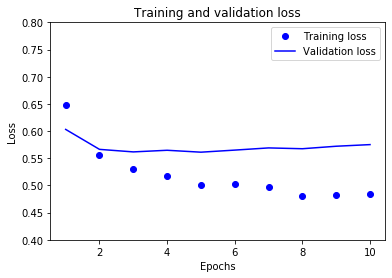

In [117]:
history_dict = history.history
history_dict.keys()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylim(0.4,0.8)
plt.ylabel('Loss')
plt.legend()

plt.show()

In [118]:
probability_model = keras.Sequential([
    model,
    layers.Softmax()
])
probability=probability_model.predict(cnn_validation_data)
valid_label=[np.argmax(probability[i]) for i in range(len(probability))]
valid_proba=probability.flatten()[1::2]
get_metrics(cnn_validation_labels,valid_label,valid_proba)

Accuracy: 0.7
Precision: 0.69
Recall: 0.74
F1 Score: 0.71
Log loss: 0.58
Confusion matrix: 


,0,1
0,93,50
1,39,110


In [119]:
test_in_use_df
team1_test_df=drop_prefix(test_in_use_df.filter(regex='^team1_',axis=1),'team1_')[selected_feature[1:]]
team2_test_df=drop_prefix(test_in_use_df.filter(regex='^team2_',axis=1),'team2_')[selected_feature[1:]]
cnn_team_one_test=(team1_test_df-cnn_mean)/cnn_std
cnn_team_one_test=cnn_team_one_test.fillna(0)
cnn_team_two_test=(team2_test_df-cnn_mean)/cnn_std
cnn_team_two_test=cnn_team_two_test.fillna(0)
cnn_test=np.stack((cnn_team_one_test.values,cnn_team_two_test.values),axis=1)
cnn_test=cnn_test.reshape((len(cnn_test),2,16,1))

In [120]:
probability=probability_model.predict(cnn_test)

In [121]:
probability.flatten()[1::2]
pd.Series(probability.flatten()[1::2],index=test_df.index,name='probability').to_csv('submission_keras.csv',header=True)

In [122]:
final_train['seed']

game_id
2008-1242.0-1340.0   -15
2004-1246.0-1197.0   -15
2009-1328.0-1288.0   -13
2002-1104.0-1194.0   -13
2005-1452.0-1403.0     1
2003-1268.0-1423.0    -5
2002-1356.0-1208.0     8
2007-1207.0-1314.0     1
2002-1268.0-1246.0    -3
2011-1314.0-1449.0    -5
2011-1242.0-1228.0    -8
2003-1277.0-1196.0     5
2002-1231.0-1423.0    -8
2012-1314.0-1436.0   -15
2004-1458.0-1350.0    -5
2002-1231.0-1428.0    -7
2004-1153.0-1190.0    -9
2003-1242.0-1429.0   -13
2013-1276.0-1242.0     3
2015-1181.0-1211.0    -1
2008-1443.0-1360.0    -1
2005-1458.0-1320.0    -5
2012-1326.0-1393.0     1
2004-1334.0-1344.0     7
2005-1452.0-1166.0    -3
2006-1261.0-1401.0    -8
2007-1458.0-1394.0   -13
2017-1116.0-1371.0    -1
2003-1338.0-1447.0   -13
2015-1181.0-1352.0   -15
                      ..
2015-1277.0-1328.0    -4
2007-1326.0-1207.0     1
2017-1455.0-1173.0    -3
2005-1449.0-1334.0     7
2017-1376.0-1181.0    -5
2003-1400.0-1277.0     6
2009-1329.0-1397.0     1
2014-1196.0-1417.0     3
2002-1458.0-1385.

In [123]:
seedonly_prob=final_train['seed'].map(lambda x: 0.0001 if x>0 else 0.9999)
seedonly=final_train['seed'].map(lambda x: 0 if x>0 else 1)
get_metrics(labels,seedonly,seedonly_prob)

Accuracy: 0.71
Precision: 0.7
Recall: 0.73
F1 Score: 0.72
Log loss: 2.68
Confusion matrix: 


,0,1
0,402,182
1,157,426
